In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import PIL
import os
import random

In [2]:
metadata_df = pd.read_csv('ham_dataset/HAM10000_metadata.csv')
metadata_df

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face


In [3]:
metadata_df['dx'].value_counts()

nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64

In [7]:
unique_metadata_df = metadata_df.drop_duplicates(subset='lesion_id')
unique_metadata_df

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
6,HAM_0002761,ISIC_0029176,bkl,histo,60.0,male,face
8,HAM_0005132,ISIC_0025837,bkl,histo,70.0,female,back
...,...,...,...,...,...,...,...
9994,HAM_0000193,ISIC_0030877,akiec,histo,60.0,female,face
10001,HAM_0000020,ISIC_0031922,akiec,histo,60.0,female,face
10004,HAM_0005579,ISIC_0029309,akiec,histo,80.0,male,face
10008,HAM_0001576,ISIC_0033705,akiec,histo,60.0,male,face


In [8]:
unique_metadata_df['dx'].value_counts()

nv       5403
bkl       727
mel       614
bcc       327
akiec     228
vasc       98
df         73
Name: dx, dtype: int64

In [9]:
unique_metadata_df['dx'].value_counts().keys()

Index(['nv', 'bkl', 'mel', 'bcc', 'akiec', 'vasc', 'df'], dtype='object')

In [14]:
case_codes = ['nv', 'bkl', 'mel', 'bcc']
samples_to_select = 327

df_to_concat = []

for case_code in case_codes:
    sample_case_df = unique_metadata_df[unique_metadata_df['dx'] == case_code].sample(samples_to_select)
    df_to_concat.append(sample_case_df)
    
case_codes = ['akiec', 'vasc', 'df']
for case_code in case_codes:
    sample_case_df = metadata_df[metadata_df['dx'] == case_code]
    df_to_concat.append(sample_case_df)

new_samples_df = pd.concat(df_to_concat)
new_samples_df

,lesion_id,image_id,dx,dx_type,age,sex,localization
3026,HAM_0004535,ISIC_0024364,nv,follow_up,45.0,male,upper extremity
8076,HAM_0004675,ISIC_0031411,nv,histo,55.0,female,lower extremity
6164,HAM_0004311,ISIC_0029037,nv,follow_up,35.0,female,trunk
3817,HAM_0004625,ISIC_0029346,nv,follow_up,40.0,male,upper extremity
3401,HAM_0006689,ISIC_0024493,nv,follow_up,40.0,male,lower extremity
...,...,...,...,...,...,...,...
1205,HAM_0007569,ISIC_0025373,df,consensus,35.0,female,lower extremity
1206,HAM_0001841,ISIC_0025771,df,consensus,35.0,female,lower extremity
1207,HAM_0006707,ISIC_0030870,df,consensus,45.0,female,lower extremity
1208,HAM_0002153,ISIC_0029297,df,consensus,40.0,female,lower extremity


In [15]:
new_samples_df['dx'].value_counts()

nv       327
bkl      327
mel      327
bcc      327
akiec    327
vasc     142
df       115
Name: dx, dtype: int64

In [16]:
new_samples_df.to_csv('bigger_choosen_sample.csv', index=False)

In [2]:
new_samples_df = pd.read_csv('bigger_choosen_sample.csv')
new_samples_df

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0004535,ISIC_0024364,nv,follow_up,45.0,male,upper extremity
1,HAM_0004675,ISIC_0031411,nv,histo,55.0,female,lower extremity
2,HAM_0004311,ISIC_0029037,nv,follow_up,35.0,female,trunk
3,HAM_0004625,ISIC_0029346,nv,follow_up,40.0,male,upper extremity
4,HAM_0006689,ISIC_0024493,nv,follow_up,40.0,male,lower extremity
...,...,...,...,...,...,...,...
1887,HAM_0007569,ISIC_0025373,df,consensus,35.0,female,lower extremity
1888,HAM_0001841,ISIC_0025771,df,consensus,35.0,female,lower extremity
1889,HAM_0006707,ISIC_0030870,df,consensus,45.0,female,lower extremity
1890,HAM_0002153,ISIC_0029297,df,consensus,40.0,female,lower extremity


In [ ]:
import os
import shutil

source_dirs = ['ham_dataset/HAM10000_images_part_1', 'ham_dataset/HAM10000_images_part_2']
destination_dir_base = 'bigger_ham_sample'

for index, row in new_samples_df.iterrows():    
    for source_dir in source_dirs:
        file_name = f"{row['image_id']}.jpg"
        destination_dir = f"{destination_dir_base}/{row['dx']}"

        if os.path.exists(os.path.join(source_dir, file_name)):
            if not os.path.exists(destination_dir):
                os.makedirs(destination_dir)

            shutil.copy(os.path.join(source_dir, file_name), os.path.join(destination_dir, file_name))
            print(f"File '{file_name}' copied to '{destination_dir}'.")

In [3]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [10]:
data_dir = 'bigger_ham_sample'
validation_split = 0.15
batch_size = 32
# img_height = 150
# img_width = 200
img_height = 75
img_width = 100
seed = 2024

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=validation_split,
  subset="training",
  seed=seed,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=validation_split,
  subset="validation",
  seed=seed,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1892 files belonging to 7 classes.
Using 1609 files for training.
Found 1892 files belonging to 7 classes.
Using 283 files for validation.


In [4]:
class_names = train_ds.class_names
num_classes = len(class_names)
print(class_names)

['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']


In [5]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [36]:
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='valid', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='valid', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='valid', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dropout(0.5),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.3),
  layers.Dense(64, activation='relu'),
  layers.Dense(num_classes, activation='softmax')
])

In [37]:
lr = 0.001

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [38]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 75, 100, 3)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 73, 98, 16)        448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 36, 49, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 34, 47, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 17, 23, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 15, 21, 64)       

In [39]:
epochs = 50

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
51/51 [==============================] - 2s 22ms/step - loss: 1.8211 - accuracy: 0.2641 - val_loss: 1.7629 - val_accuracy: 0.3251
Epoch 2/50
51/51 [==============================] - 1s 13ms/step - loss: 1.6797 - accuracy: 0.3356 - val_loss: 1.5954 - val_accuracy: 0.3569
Epoch 3/50
51/51 [==============================] - 1s 13ms/step - loss: 1.6063 - accuracy: 0.3741 - val_loss: 1.5333 - val_accuracy: 0.3887
Epoch 4/50
51/51 [==============================] - 1s 13ms/step - loss: 1.5433 - accuracy: 0.3922 - val_loss: 1.5512 - val_accuracy: 0.3993
Epoch 5/50
51/51 [==============================] - 1s 13ms/step - loss: 1.4989 - accuracy: 0.4195 - val_loss: 1.5490 - val_accuracy: 0.3887
Epoch 6/50
51/51 [==============================] - 1s 13ms/step - loss: 1.4602 - accuracy: 0.4419 - val_loss: 1.4138 - val_accuracy: 0.4629
Epoch 7/50
51/51 [==============================] - 1s 13ms/step - loss: 1.3546 - accuracy: 0.4798 - val_loss: 1.2905 - val_accuracy: 0.5265
Epoch 8/50
51

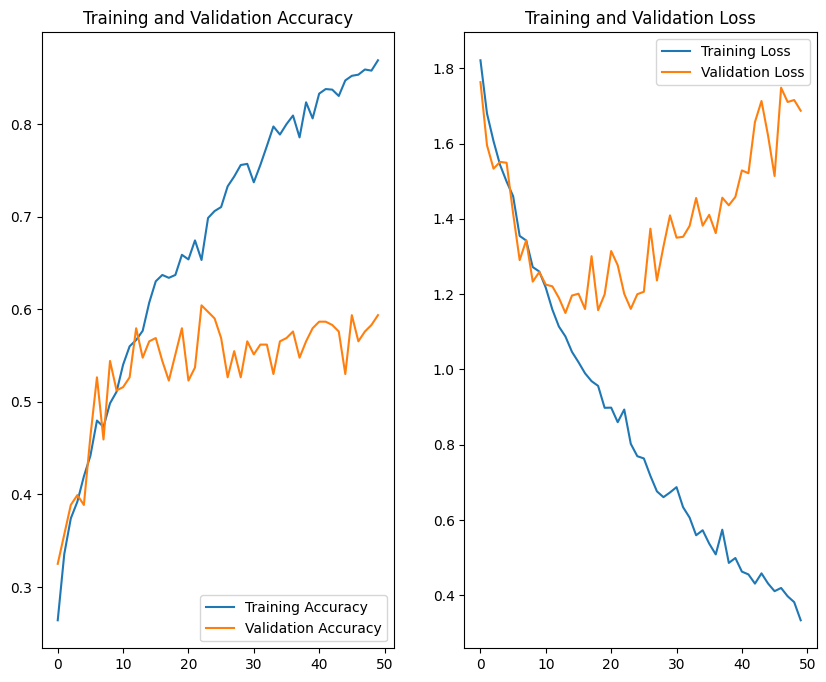

In [42]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [20]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout

num_classes = 7

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(32, activation='relu')(x)
output = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

In [21]:
lr = 0.00001

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [22]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=25
)

Epoch 1/25
51/51 [==============================] - 18s 229ms/step - loss: 2.9920 - accuracy: 0.1740 - val_loss: 1.9496 - val_accuracy: 0.1590
Epoch 2/25
51/51 [==============================] - 9s 163ms/step - loss: 1.9400 - accuracy: 0.2076 - val_loss: 1.8689 - val_accuracy: 0.1625
Epoch 3/25
51/51 [==============================] - 9s 164ms/step - loss: 1.8505 - accuracy: 0.2262 - val_loss: 1.7967 - val_accuracy: 0.2261
Epoch 4/25
51/51 [==============================] - 9s 167ms/step - loss: 1.7731 - accuracy: 0.2666 - val_loss: 1.7250 - val_accuracy: 0.3640
Epoch 5/25
51/51 [==============================] - 9s 164ms/step - loss: 1.6745 - accuracy: 0.3244 - val_loss: 1.6270 - val_accuracy: 0.4134
Epoch 6/25
51/51 [==============================] - 9s 167ms/step - loss: 1.5891 - accuracy: 0.3909 - val_loss: 1.5387 - val_accuracy: 0.4488
Epoch 7/25
51/51 [==============================] - 9s 166ms/step - loss: 1.4739 - accuracy: 0.4394 - val_loss: 1.4545 - val_accuracy: 0.4982
Epoch

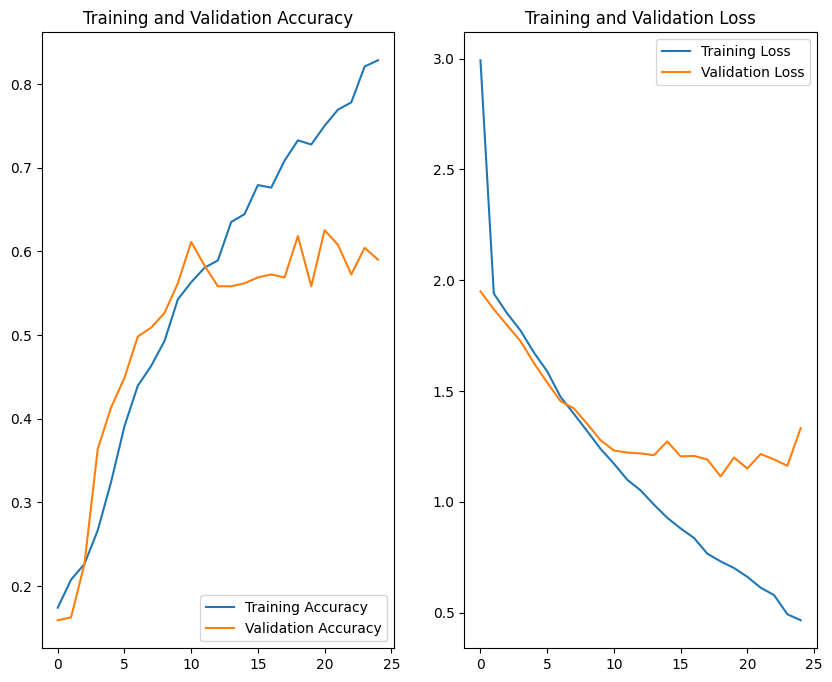

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(25)

plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [11]:
from tensorflow.keras.applications import MobileNetV3Small
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Flatten, Dropout


num_classes = 7

base_model = MobileNetV3Small(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

x = GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(32, activation='relu')(x)
output = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

4334752/4334752 [==============================] - 1s 0us/step


In [18]:
lr = 0.0001

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [19]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=75
)

Epoch 1/25
51/51 [==============================] - 10s 77ms/step - loss: 1.1648 - accuracy: 0.5817 - val_loss: 1.2345 - val_accuracy: 0.5230
Epoch 2/25
51/51 [==============================] - 4s 68ms/step - loss: 1.1052 - accuracy: 0.5935 - val_loss: 1.2220 - val_accuracy: 0.5265
Epoch 3/25
51/51 [==============================] - 3s 63ms/step - loss: 0.9832 - accuracy: 0.6576 - val_loss: 1.1929 - val_accuracy: 0.5654
Epoch 4/25
51/51 [==============================] - 3s 66ms/step - loss: 0.8960 - accuracy: 0.6849 - val_loss: 1.2059 - val_accuracy: 0.5371
Epoch 5/25
51/51 [==============================] - 3s 65ms/step - loss: 0.7992 - accuracy: 0.7154 - val_loss: 1.1818 - val_accuracy: 0.5760
Epoch 6/25
51/51 [==============================] - 3s 65ms/step - loss: 0.7561 - accuracy: 0.7247 - val_loss: 1.1803 - val_accuracy: 0.5795
Epoch 7/25
51/51 [==============================] - 3s 64ms/step - loss: 0.6808 - accuracy: 0.7489 - val_loss: 1.1986 - val_accuracy: 0.5760
Epoch 8/25
5

In [24]:
# try to use https://www.tensorflow.org/api_docs/python/tf/keras/applications/ConvNeXtTiny also